In [1]:
from PlacePulseDataset import PlacePulseDataset

In [2]:
# Loads the dataset by downloading, extracting, preprocessing, and deleting the archive.
# Depending on your connection speed, might take some time to finish.

PlacePulseDataset.load()

Extracting files: 100%|██████████| 110994/110994 [00:44<00:00, 2472.85file/s]


Deleting archive.


Preprocessing images: 100%|██████████| 110988/110988 [00:39<00:00, 2813.44file/s]


Cleaning up.
Removing samples where image is missing.


In [4]:
dataset = PlacePulseDataset(study_type='beautiful')

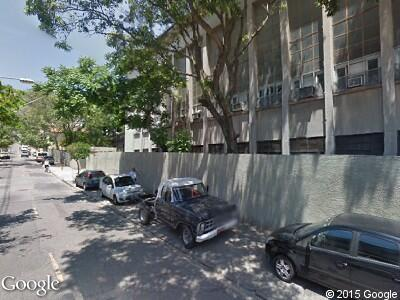

In [5]:
from PIL import Image
(image_array, score) = dataset[0]
image = Image.fromarray(image_array)
image

In [6]:
type(score)

numpy.float32

In [7]:
print(f"TrueSkill score: {score}")

TrueSkill score: 17.800617218017578


# Training a model

In [9]:
from PlacePulseDataset import transform_transformer
from torch.utils.data import Subset

train_dataset = PlacePulseDataset(study_type='beautiful', transform=transform_transformer, split='train')
val_dataset = PlacePulseDataset(study_type='beautiful', transform=transform_transformer, split='val')

indices = list(range(10))
train_dataset = Subset(train_dataset, indices)
val_dataset = Subset(val_dataset, indices)


In [10]:
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import DataLoader
from tqdm import tqdm

In [11]:
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

model = models.vgg16()

# Modify the classifier for linear regression
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, 1)  # Single output node for regression

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}]')

    # Training
    train_loss = 0.0
    for images, ratings in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        outputs = outputs.squeeze()
        loss = criterion(outputs, ratings)
        
        loss.backward()
        optimizer.step()

        train_loss += loss.item() 
    train_loss /= len(train_loader)
    print(f'Train Loss: {train_loss:.4f}')
    
    # Validation
    val_loss = 0.0
    for images, ratings in tqdm(val_loader):
        outputs = model(images)
        outputs = outputs.squeeze()
        loss = criterion(outputs, ratings)
        
        val_loss += loss.item()
    val_loss /= len(val_loader)
    print(f'Validation Loss: {val_loss:.4f}')

Epoch [1/10]


100%|██████████| 3/3 [00:04<00:00,  1.57s/it]


Train Loss: 597.5421


100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


Validation Loss: 768.9232
Epoch [2/10]


100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


Train Loss: 587.6681


100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


Validation Loss: 758.8502
Epoch [3/10]


100%|██████████| 3/3 [00:04<00:00,  1.49s/it]


Train Loss: 578.0627


100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


Validation Loss: 748.7124
Epoch [4/10]


100%|██████████| 3/3 [00:04<00:00,  1.42s/it]


Train Loss: 568.0182


100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


Validation Loss: 737.1520
Epoch [5/10]


100%|██████████| 3/3 [00:04<00:00,  1.47s/it]


Train Loss: 561.0047


100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


Validation Loss: 725.7903
Epoch [6/10]


100%|██████████| 3/3 [00:04<00:00,  1.45s/it]


Train Loss: 549.7869


100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


Validation Loss: 715.5594
Epoch [7/10]


100%|██████████| 3/3 [00:04<00:00,  1.40s/it]


Train Loss: 540.8707


100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation Loss: 706.6789
Epoch [8/10]


100%|██████████| 3/3 [00:04<00:00,  1.44s/it]


Train Loss: 531.7378


100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


Validation Loss: 698.5460
Epoch [9/10]


100%|██████████| 3/3 [00:04<00:00,  1.63s/it]


Train Loss: 525.3433


100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


Validation Loss: 688.5361
Epoch [10/10]


100%|██████████| 3/3 [00:04<00:00,  1.51s/it]


Train Loss: 516.2426


100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

Validation Loss: 677.7412
